# Gaussian-Naive-Bayes Classifier
## Definition
> Prerequisites to increase your understanding
> - Programming knowledge with Python
> - Naive-Bayes knowledge ([More information](Naive-Bayes-Classifier.ipynb))
> - Jupyter notebook knowledge

Naive Bayes classification method can be extended for real-valued features. If the values in our dataset have a continuous pattern, it may be chosen Gaussian Naive Bayes classification. There are other types of funtions but Gaussian (or normal distribution) is the simplest one because you only need to compute the mean and standard deviation from your training dataset. 

The Gaussian distribution is denoted by;

\begin{equation}
X \sim \mathcal{N}(\mu, \sigma^2)
\end{equation}

* $X$ is a random variable.
* $\sim$ is tilda that means "distributed as".
* $\mu$ is mean which is the center of the curve.
* $\sigma^2$ is the standard deviation squared that is also called **variance** (more technically it indicates risk).

For example, suppose we have a parameter distribution like below

\begin{equation}
\{x_1, x_2, x_3, \dots , x_m \} \in \mathbf{R}
\end{equation}

<img src="parameters.png"  style="height:50%;width:70%" />

It is not hard to draw the chart below intuitively

<img src="parameter-distribution.png"  style="height:50%;width:70%" />

We can simply write the equations below;

\begin{align}
\mu = \frac{1}{m} \sum_{i = 1}^m x_i
\end{align}

\begin{align}
\sigma^2 = \frac{1}{m} \sum_{i = 1}^m (x_i - \mu)^2
\end{align}

> - It is obvious why we calculate $\sigma^2$ as a variance because $\sigma$ becomes negative in the left side of the chart above.
> - The main characteristic of Gaussian distribution is that the area under the bell-curve is equal to 1.

## Gaussian Formulation

<img src="gaussian-distribution.png"  style="height:50%;width:70%" />

The formula of the Gaussian distribution (above) is formulated like: 

\begin{equation}
y = \frac{1}{\sigma \sqrt{2\pi}} e^-\frac{\left(x-\mu \right)}{2\sigma^2}
\end{equation}

* $\mu$ is mean which is the center of the curve.
* $\sigma$ is stardard deviation which describes how the data spreads out.

This formula is also called as **the probability density function**.

With the m-featured training set, we can compute the possibilities of each sample $x$ like

\begin{align}
& Training Set \in \{x_1, x_2, x_3, \dots , x_m \} \\
& x \in R^n \\
& P(x) = P(x_1 \mid \mu_{1}, \sigma_{1}^2) P(x_2 \mid \mu_{2}, \sigma_{2}^2) \dots P(x_n \mid \mu_{n}, \sigma_{n}^2) \\
& P(x) = \Pi_{i=1}^n P(x_i \mid \mu_{i}, \sigma_{i}^2) \\
& P(x) = \Pi_{i=1}^n \left( \frac{1}{\sigma_{i} \sqrt{2\pi}} e^-\frac{\left(x_i-\mu_{i} \right)}{2\sigma_{i}^2} \right)
\end{align}

In [1]:
# libraries
import pandas as pd
import numpy as np

dataset = pd.read_csv('iris.txt',sep=' ')

# if dataset.index % test_indis == 0 
# then it is going to be used as test dataset
# they will not be attended into the train dataset
test_indis = 11

test_dataset = dataset[dataset.index % test_indis == 0]
train_dataset = dataset[dataset.index % test_indis != 0]

# total count of sample space
total = float(len(train_dataset))

train_dataset.describe()

,sl,sw,pl,pw,c
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5.858824,3.036765,3.770588,1.198529,2.007353
std,0.841821,0.431845,1.770211,0.761479,0.820987
min,4.300000,2.000000,1.100000,0.100000,1.000000
25%,5.100000,2.800000,1.575000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


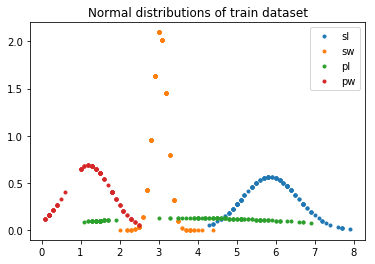

In [2]:
# libraries
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
import math

def pdf(x, mean, std):
    std = std**2
    return (np.exp(-np.power(x - mean, 2.) / (2 * np.power(std, 2.)))) / (std * np.power(2 * math.pi, 1/2))
# end of def pdf

# loop in columns of dataset
for clm in train_dataset.columns:
    if clm != "c":
        mean, std = train_dataset[clm].mean(), train_dataset[clm].std()
        gaussian = pdf(train_dataset[clm], mean, std)
        plt.plot(train_dataset[clm], gaussian, ".")
# end of for loop

# plotting
plt.title("Normal distributions of train dataset")
plt.legend()
plt.show()

In [23]:
train_dataset_1 = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 1]]
train_dataset_2 = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 2]]
train_dataset_3 = train_dataset.loc[[idx for idx, item in train_dataset.iterrows() if item.c == 3]]

pc_1 = len(train_dataset_1) / (total)
pc_2 = len(train_dataset_2) / (total)
pc_3 = len(train_dataset_3) / (total)

columns = ["sl", "sw", "pl", "pw"]

mean_sl1 = train_dataset_1[columns[0]].mean()
mean_sl2 = train_dataset_2[columns[0]].mean()
mean_sl3 = train_dataset_3[columns[0]].mean()
mean_sw1 = train_dataset_1[columns[1]].mean()
mean_sw2 = train_dataset_2[columns[1]].mean()
mean_sw3 = train_dataset_3[columns[1]].mean()
mean_pl1 = train_dataset_1[columns[2]].mean()
mean_pl2 = train_dataset_2[columns[2]].mean()
mean_pl3 = train_dataset_3[columns[2]].mean()
mean_pw1 = train_dataset_1[columns[3]].mean()
mean_pw2 = train_dataset_2[columns[3]].mean()
mean_pw3 = train_dataset_3[columns[3]].mean()

std_sl1 = train_dataset_1[columns[0]].std()
std_sl2 = train_dataset_2[columns[0]].std()
std_sl3 = train_dataset_3[columns[0]].std()
std_sw1 = train_dataset_1[columns[1]].std()
std_sw2 = train_dataset_2[columns[1]].std()
std_sw3 = train_dataset_3[columns[1]].std()
std_pl1 = train_dataset_1[columns[2]].std()
std_pl2 = train_dataset_2[columns[2]].std()
std_pl3 = train_dataset_3[columns[2]].std()
std_pw1 = train_dataset_1[columns[3]].std()
std_pw2 = train_dataset_2[columns[3]].std()
std_pw3 = train_dataset_3[columns[3]].std()

gaussian_sl1 = pdf(test_dataset[columns[0]], mean_sl1, std_sl1)
gaussian_sl2 = pdf(test_dataset[columns[0]], mean_sl2, std_sl2)
gaussian_sl3 = pdf(test_dataset[columns[0]], mean_sl3, std_sl3)
gaussian_sw1 = pdf(test_dataset[columns[1]], mean_sw1, std_sw1)
gaussian_sw2 = pdf(test_dataset[columns[1]], mean_sw2, std_sw2)
gaussian_sw3 = pdf(test_dataset[columns[1]], mean_sw3, std_sw3)
gaussian_pl1 = pdf(test_dataset[columns[2]], mean_pl1, std_pl1)
gaussian_pl2 = pdf(test_dataset[columns[2]], mean_pl2, std_pl2)
gaussian_pl3 = pdf(test_dataset[columns[2]], mean_pl3, std_pl3)
gaussian_pw1 = pdf(test_dataset[columns[3]], mean_pw1, std_pw1)
gaussian_pw2 = pdf(test_dataset[columns[3]], mean_pw2, std_pw2)
gaussian_pw3 = pdf(test_dataset[columns[3]], mean_pw3, std_pw3)

p_1 = gaussian_sl1 * gaussian_sw1 * gaussian_pl1 * gaussian_pw1 * pc_1
p_2 = gaussian_sl2 * gaussian_sw2 * gaussian_pl2 * gaussian_pw2 * pc_2
p_3 = gaussian_sl3 * gaussian_sw3 * gaussian_pl3 * gaussian_pw3 * pc_3

print("test_dataset  :", np.array(test_dataset[["c"]]).T[0])

p_arr = np.array([p_1, p_2, p_3])
p = p_arr / np.sum(p_arr, axis=0)

print("classification:", np.array([j + 1 for idx in p.T for j in range(len(idx)) if idx[j] == np.max(idx)]))

test_dataset  : [1 1 1 1 1 2 2 2 2 2 3 3 3 3]
classification: [1 1 1 1 1 2 2 3 2 2 3 3 3 3]


## References
* Scikit-learn, Naive Bayes, http://scikit-learn.org/stable/modules/naive_bayes.html (30/10/2017)
* Machine Learing Mastery, https://machinelearningmastery.com/naive-bayes-for-machine-learning/ (30/10/2017)
* Normal distribution - Wikipedia, https://en.wikipedia.org/wiki/Normal_distribution#Properties (08/11/2017)